### Tl;dr ###
Paring down the dataset from about 480,000 to 300,000 doesn't really change any of the already observed trends. In the 300k dataset 2020's songs seem to have more relative representation, as does the alternative genre. Alos, the box and whisker plots of intequartile ranges of rap and electronic music are noticeably different, but none of these affect the overall trends observed before. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path_to_clean_df='../../data/clean.csv'
df=pd.read_csv(path_to_clean_df)

### Number of songs per decade: ###

decade
2010.0    128479
2000.0     68623
1990.0     32982
2020.0     31499
1980.0     16474
1970.0     13790
1960.0      7899
1950.0      1296
Name: count, dtype: int64


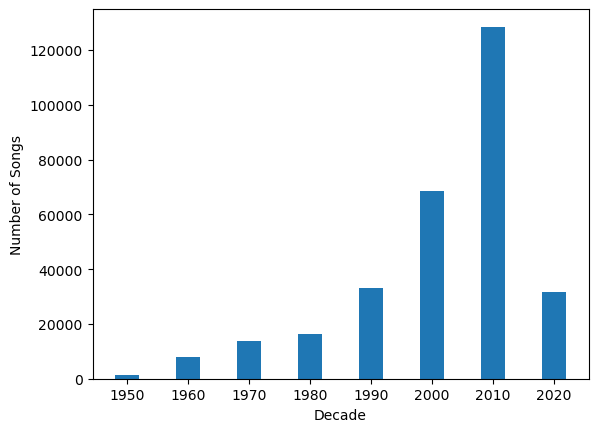

In [3]:
yrs=df['decade'].value_counts()
print(yrs)
plt.bar(yrs.index,yrs,width=4)
plt.xlabel('Decade')
plt.ylabel('Number of Songs')
plt.show()

### Number of songs per genre ###

main_genre
pop            72534
rock           57441
country        44872
alternative    42226
pop rock       33975
punk           14371
metal          10121
rap             8698
soul            6151
jazz            5296
reggae          3298
electronic      2059
Name: count, dtype: int64


Text(0, 0.5, 'Main Genre')

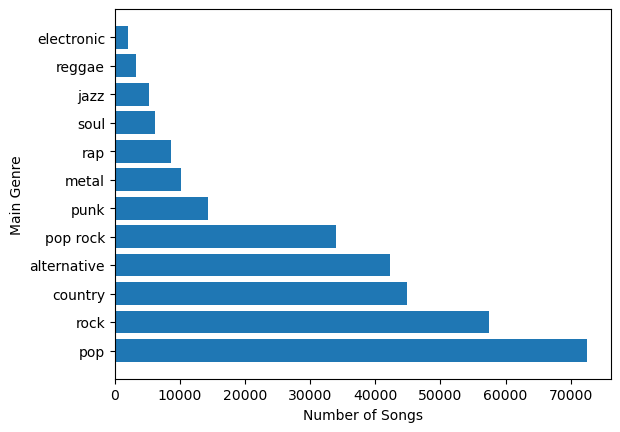

In [4]:
grs=df['main_genre'].value_counts()
print(grs)
plt.barh(grs.index,grs)
plt.xlabel('Number of Songs')
plt.ylabel('Main Genre')

### Number of songs per number of sections: ###

In [5]:
secs=df['num_sections'].value_counts()
print(secs)

num_sections
1      115697
7       36892
6       32075
8       30380
5       21024
9       19033
4       13257
10      10249
3        6409
11       5173
2        5146
12       2617
13       1324
14        698
15        362
16        294
17        118
18         80
20         51
19         43
21         29
22         25
23          9
26          9
24          8
29          5
71          3
28          2
25          2
30          2
27          2
32          2
76          1
74          1
40          1
105         1
93          1
83          1
96          1
78          1
66          1
59          1
85          1
31          1
33          1
43          1
73          1
106         1
69          1
94          1
39          1
54          1
37          1
36          1
Name: count, dtype: int64


There are some crazy outliers, some songs have 100+ sections. Plot only those $\leq$ 20 sections, which end up comprising more than 99% of the data.

num_sections
1     115697
7      36892
6      32075
8      30380
5      21024
9      19033
4      13257
10     10249
3       6409
11      5173
2       5146
12      2617
13      1324
14       698
15       362
16       294
17       118
18        80
20        51
19        43
Name: count, dtype: int64
300922


Text(0.5, 0, 'Number of Sections')

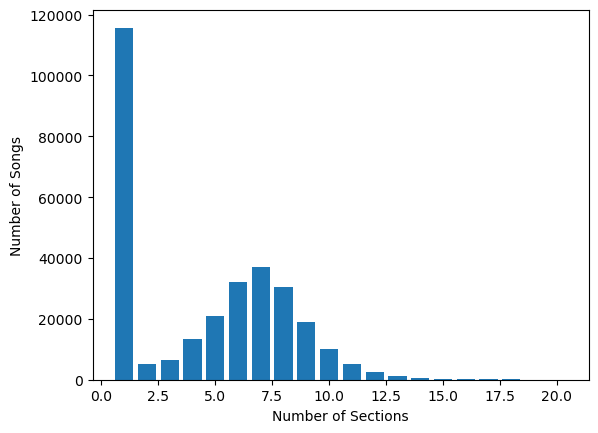

In [6]:
#bar plot
secs=df[df['num_sections']<=20].num_sections.value_counts()
print(secs)
print(secs.sum()) #accounts for over 99.9% of data
plt.bar(secs.index,secs)
plt.ylabel('Number of Songs')
plt.xlabel('Number of Sections')

From this, it's apparent that a great deal of the time, those who contributed chords didn't bother to separate their songs into sections. Therefore, these section labels aren't reliable and no further analysis involving sections should be done.

### Songs per total unique chords: ###

In [7]:
uchords=df.tot_unique_chords.value_counts().sort_index()
print(uchords)

tot_unique_chords
2       4111
3      26641
4      57723
5      55148
6      45300
       ...  
94         1
95         1
98         1
107        1
125        1
Name: count, Length: 80, dtype: int64


Again, some huge outliers. Limit plot to songs with $\leq$ 30 unique chords, which account for over 99.5% of all data.

tot_unique_chords
4     57723
5     55148
6     45300
7     32064
3     26641
8     21826
9     15086
10    10773
11     7635
12     5596
13     4128
2      4111
14     3135
15     2299
16     1783
17     1454
18     1121
19      911
20      709
21      580
22      466
23      387
24      343
25      246
26      232
28      173
27      157
29      122
30      112
Name: count, dtype: int64
300261


Text(0.5, 0, 'Number of Unique Chords')

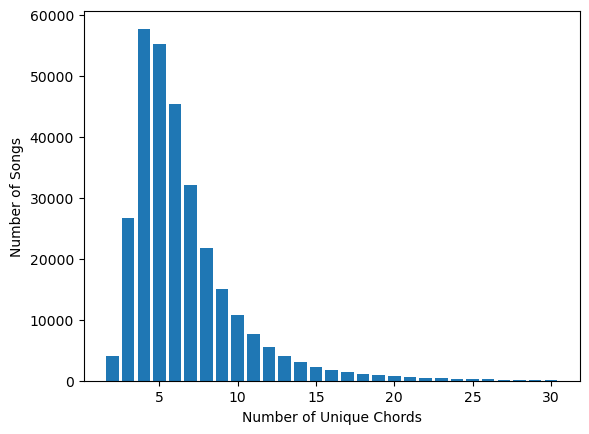

In [8]:

uchords=df[df['tot_unique_chords']<=30].tot_unique_chords.value_counts()
print(uchords)
print(uchords.sum()) #accounts for over 99.5% of data
plt.bar(uchords.index,uchords)
plt.ylabel('Number of Songs')
plt.xlabel('Number of Unique Chords')

<Figure size 640x480 with 0 Axes>

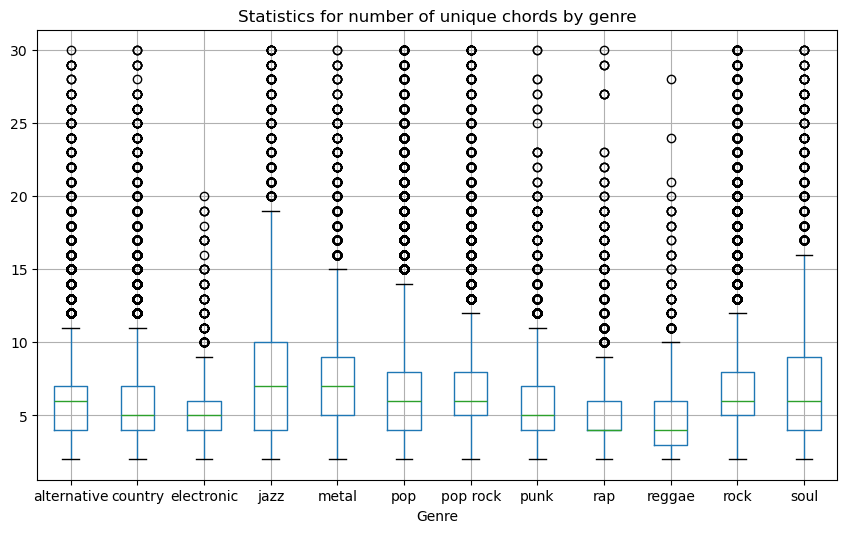

In [9]:
#box and whisker grouped by genre
plt.figure()
df[df['tot_unique_chords']<=30].boxplot(column='tot_unique_chords',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for number of unique chords by genre')
plt.show()

In [10]:
#mean number of unique chords per genre
df[['tot_unique_chords','main_genre']].groupby('main_genre').mean()

,tot_unique_chords
main_genre,
alternative,6.192346
country,5.708058
electronic,5.346770
jazz,8.729607
metal,7.704278
pop,6.798233
pop rock,7.197704
punk,5.871338
rap,5.024718


Rap, reggae and electronic all have low medians/3rd quartiles and means. Metal, soul and jazz have the highest medians/3rd quartiels and means.

<Figure size 640x480 with 0 Axes>

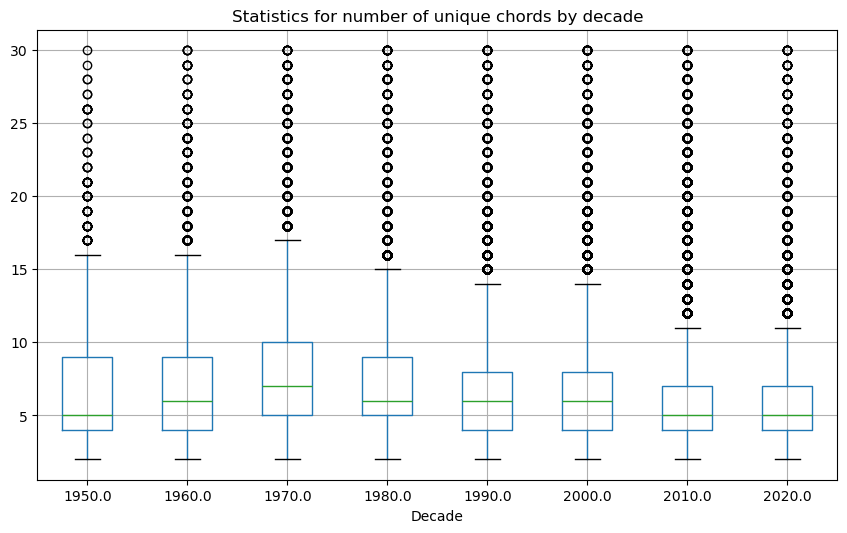

In [11]:
#box and whisker grouped by decade
plt.figure()
df[df['tot_unique_chords']<=30].boxplot(column='tot_unique_chords',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for number of unique chords by decade')
plt.show()

In [12]:
#mean number of unique chords per decade
df[['tot_unique_chords','decade']].groupby('decade').mean()

,tot_unique_chords
decade,
1950.0,7.210648
1960.0,7.465755
1970.0,8.200508
1980.0,7.620796
1990.0,7.031805
2000.0,6.559565
2010.0,6.258073
2020.0,6.425156


The means and interquartile distributions for post-2000's music seem to be lower than the rest.

### Songs by total number of chords: ###

In [13]:
tchords=df.tot_chords.value_counts().sort_index()
print(tchords)


tot_chords
5       332
6       384
7       431
8       642
9       545
       ... 
1551      1
1601      1
1648      1
2011      1
2261      1
Name: count, Length: 487, dtype: int64


Once again, large outliers. Restrict plot to songs using $\leq$ 250 chords, which comprise more than 99.5% of total data. Since this feature is more continuous than the others, use histrogram instead of bar plot.

tot_chords
72     3824
64     3716
60     3699
56     3513
76     3490
       ... 
250      16
249      15
244      13
243      11
245      11
Name: count, Length: 246, dtype: int64
300185


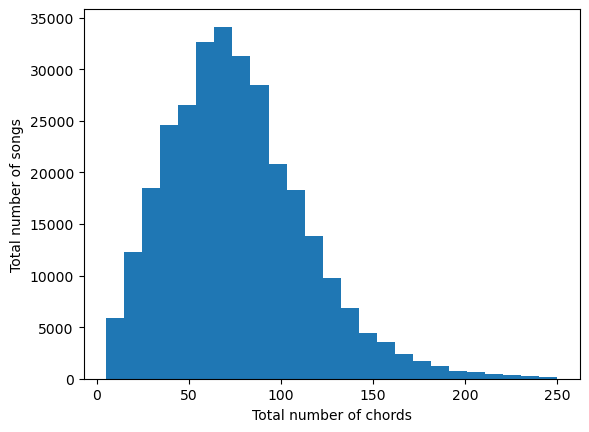

In [14]:
tchords=df[df['tot_chords']<=250].tot_chords.value_counts()
print(tchords)
print(tchords.sum()) #accounts for more than 99.5% data
#plt.bar(tchords.index,uchords)
plt.hist(df[df['tot_chords']<=250]['tot_chords'],bins=25)
plt.xlabel('Total number of chords')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

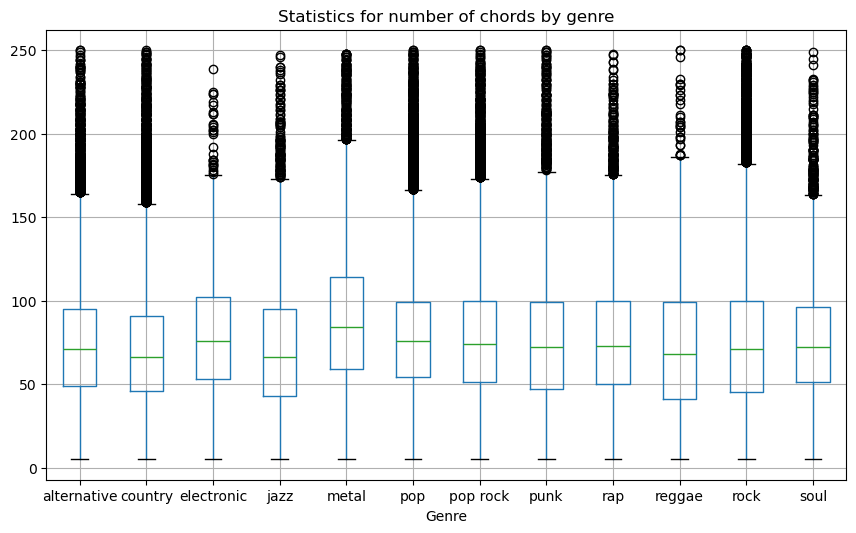

In [15]:
#box and whisker grouped by genre
plt.figure()
df[df['tot_chords']<=250].boxplot(column='tot_chords',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for number of chords by genre')
plt.show()

In [16]:
#mean number of chords per genre
df[['tot_chords','main_genre']].groupby('main_genre').mean()

,tot_chords
main_genre,
alternative,74.602259
country,71.346430
electronic,80.092278
jazz,73.414464
metal,91.877087
pop,79.080845
pop rock,78.711435
punk,76.493076
rap,78.196712


Metal again jumps out as having the highest statistics.

<Figure size 640x480 with 0 Axes>

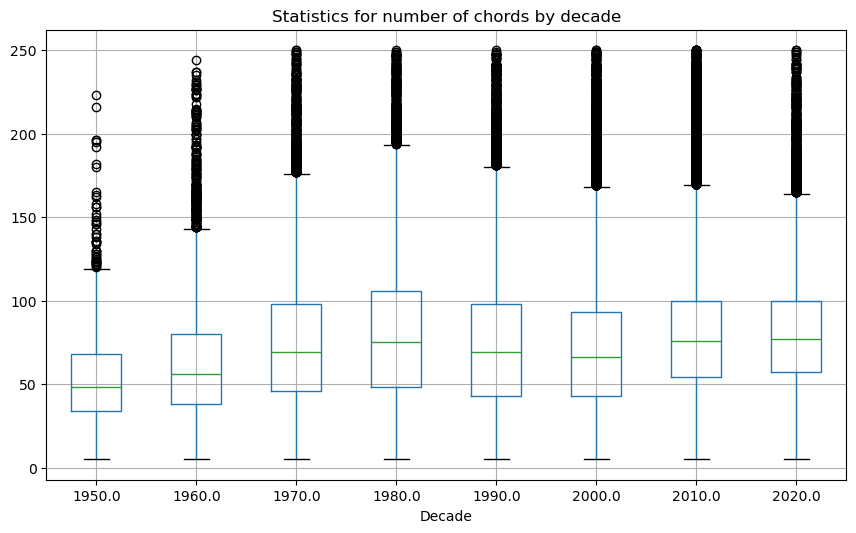

In [17]:
#box and whisker grouped by decade
plt.figure()
df[df['tot_chords']<=250].boxplot(column='tot_chords',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for number of chords by decade')
plt.show()

In [18]:
#mean number of chords per decade
df[['tot_chords','decade']].groupby('decade').mean()

,tot_chords
decade,
1950.0,54.766204
1960.0,63.781365
1970.0,77.642930
1980.0,82.291854
1990.0,75.312352
2000.0,71.772496
2010.0,79.571051
2020.0,81.343630


The interquartile distributions and means of total number of chords seem to be steadily rising since the 1950's.

### Songs per unique chord density: ####

count    301042.000000
mean          0.108552
std           0.084722
min           0.005435
25%           0.058252
50%           0.084746
75%           0.128205
max           1.000000
Name: unique_chord_density, dtype: float64


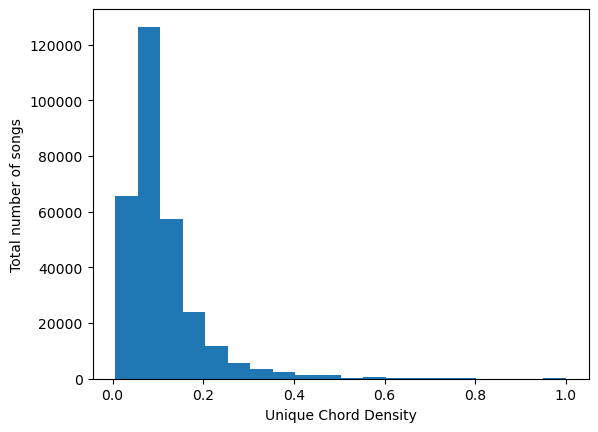

In [19]:
plt.hist(df.unique_chord_density,bins=20)
print(df.unique_chord_density.describe())
plt.xlabel('Unique Chord Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

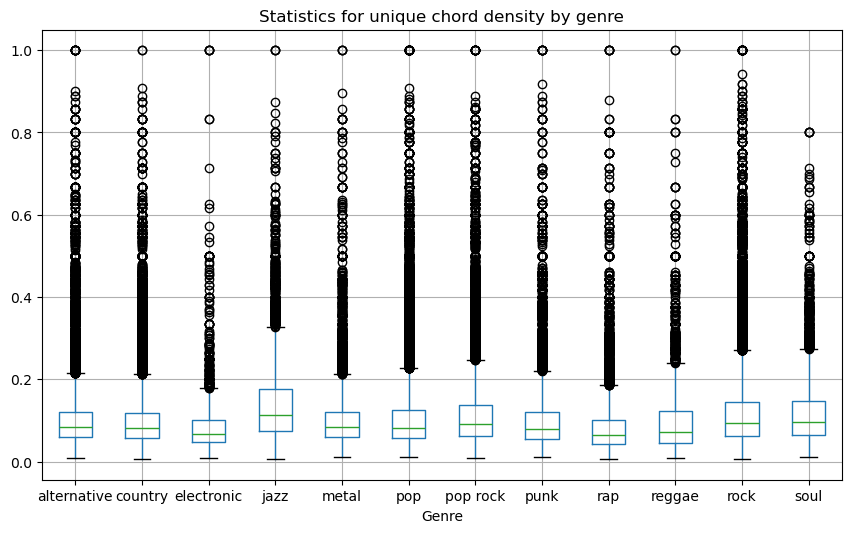

In [20]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_chord_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique chord density by genre')
plt.show()

In [21]:
#mean number of chords per decade
df[['unique_chord_density','main_genre']].groupby('main_genre').mean()

,unique_chord_density
main_genre,
alternative,0.103472
country,0.100980
electronic,0.090113
jazz,0.143630
metal,0.103995
pop,0.104358
pop rock,0.114574
punk,0.106030
rap,0.088952


Jazz is far ahead of the others in terms of mean and interquartile distribution

<Figure size 640x480 with 0 Axes>

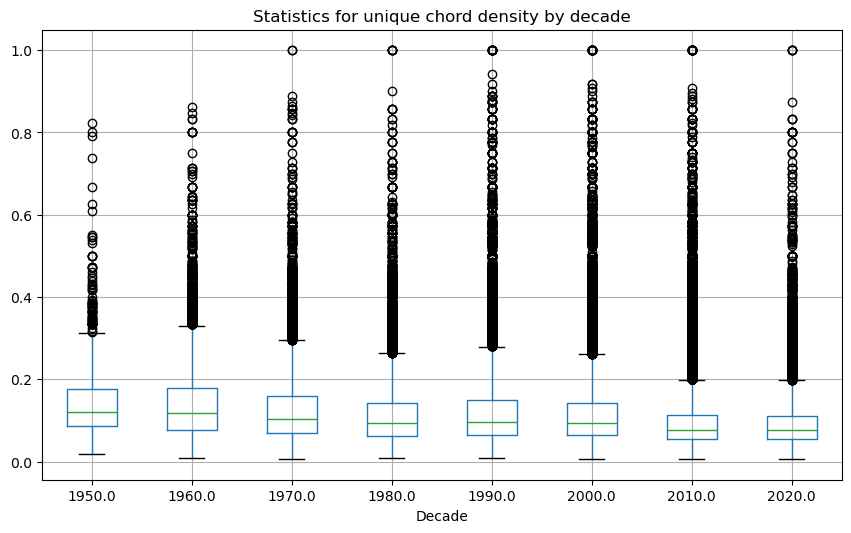

In [22]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_chord_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique chord density by decade')
plt.show()

In [23]:
#mean number of chords per decade
df[['unique_chord_density','decade']].groupby('decade').mean()

,unique_chord_density
decade,
1950.0,0.146777
1960.0,0.144736
1970.0,0.130445
1980.0,0.118629
1990.0,0.125493
2000.0,0.120876
2010.0,0.095232
2020.0,0.092792


The mean and interquartile distributions seem to generally be shifting lower over time since the 1940's.

### TL;DR: ### 
For unique 2,3,4 and 5-gram density analyses (and 2-gram density difference), the decade split results are all similar to unique chord density. The genre-split results are mostly similar too, with differences starting to emerge at n=4 or 5. So only one or two of these might be useful features.

##### Songs per unique 2-gram density: ####

count    301042.000000
mean          0.196814
std           0.132410
min           0.005435
25%           0.106667
50%           0.163934
75%           0.250000
max           0.969697
Name: unique_2gram_density, dtype: float64


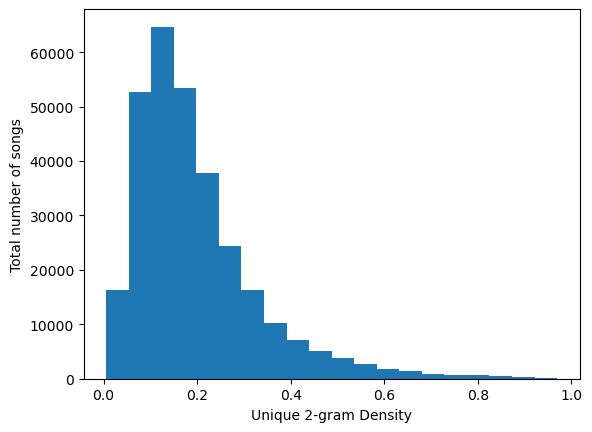

In [24]:
plt.hist(df.unique_2gram_density,bins=20)
print(df.unique_2gram_density.describe())
plt.xlabel('Unique 2-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

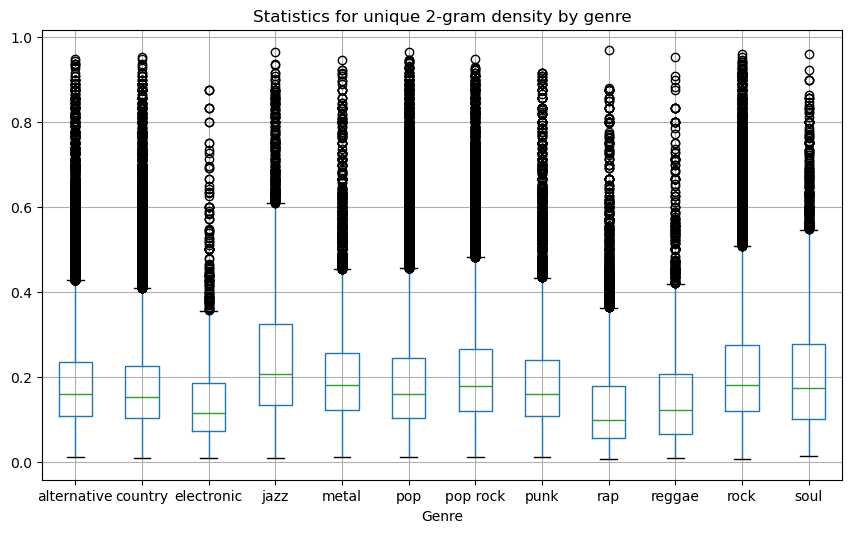

In [25]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_2gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 2-gram density by genre')
plt.show()

In [26]:
#mean unique 2-gram density per genre
df[['unique_2gram_density','main_genre']].groupby('main_genre').mean()

,unique_2gram_density
main_genre,
alternative,0.188121
country,0.182992
electronic,0.148730
jazz,0.249747
metal,0.206233
pop,0.191583
pop rock,0.211577
punk,0.194606
rap,0.139712


Again, jazz sticks typically has higher statistics, electronic and rap have lower statistics.

<Figure size 640x480 with 0 Axes>

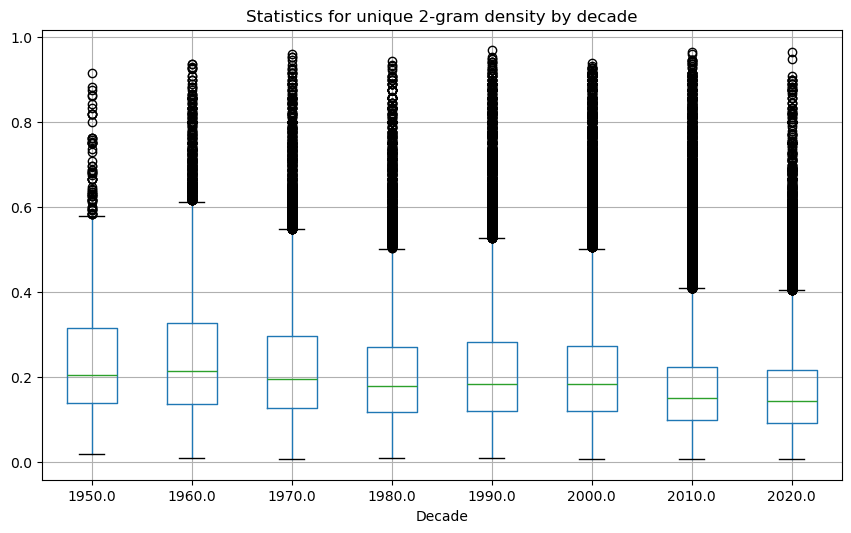

In [27]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_2gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 2-gram density by decade')
plt.show()

In [28]:
#mean unique 2-gram density per decade
df[['unique_2gram_density','decade']].groupby('decade').mean()

,unique_2gram_density
decade,
1950.0,0.249581
1960.0,0.252231
1970.0,0.231206
1980.0,0.213825
1990.0,0.222751
2000.0,0.217521
2010.0,0.175946
2020.0,0.169641


Still appears to be a bit of a downward trend over time.

##### Songs per unique 3-gram density: ####

count    301042.000000
mean          0.266072
std           0.162334
min           0.005435
25%           0.148148
50%           0.234043
75%           0.346939
max           0.978022
Name: unique_3gram_density, dtype: float64


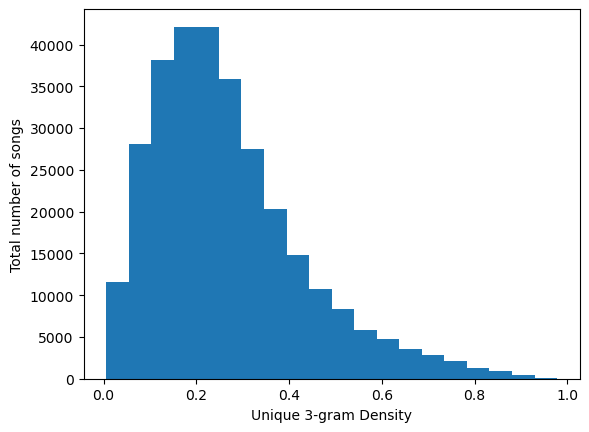

In [29]:
plt.hist(df.unique_3gram_density,bins=20)
print(df.unique_3gram_density.describe())
plt.xlabel('Unique 3-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

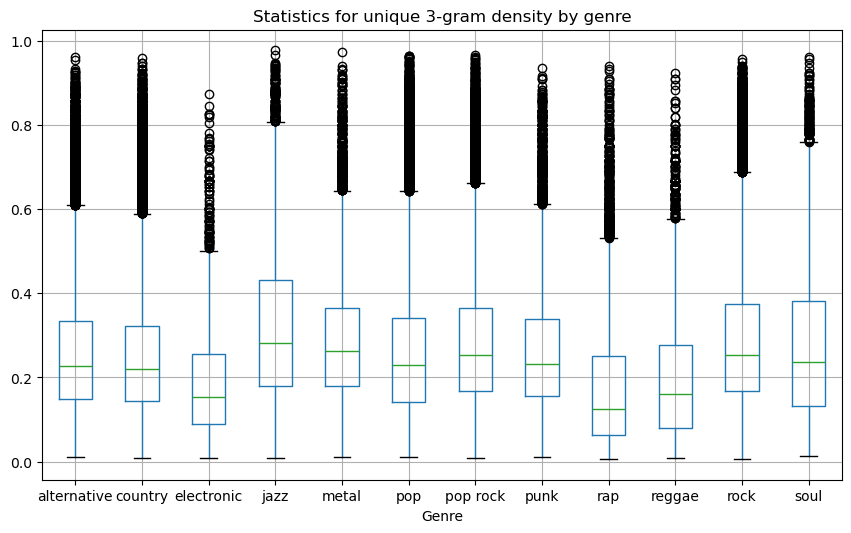

In [30]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_3gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 3-gram density by genre')
plt.show()

In [31]:
#mean unique 3-gram density per genre
df[['unique_3gram_density','main_genre']].groupby('main_genre').mean()

,unique_3gram_density
main_genre,
alternative,0.256768
country,0.251967
electronic,0.196242
jazz,0.324493
metal,0.287694
pop,0.259989
pop rock,0.285216
punk,0.265157
rap,0.180209


Again, jazz has highest statistics and electronic, rap and reggae have the lowest.

<Figure size 640x480 with 0 Axes>

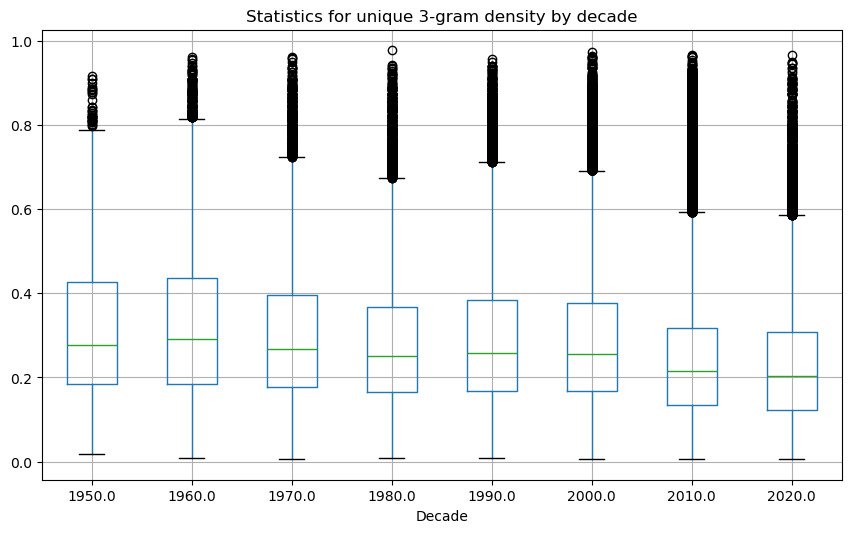

In [32]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_3gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 3-gram density by decade')
plt.show()

In [33]:
#mean unique 3-gram density per decade
df[['unique_3gram_density','decade']].groupby('decade').mean()

,unique_3gram_density
decade,
1950.0,0.323703
1960.0,0.328424
1970.0,0.304385
1980.0,0.285610
1990.0,0.295296
2000.0,0.290953
2010.0,0.242450
2020.0,0.232619


Same gradual downward trend.

##### Songs per unique 4-gram density: ####

count    301042.000000
mean          0.321408
std           0.181270
min           0.005435
25%           0.186441
50%           0.295238
75%           0.428571
max           0.974359
Name: unique_4gram_density, dtype: float64


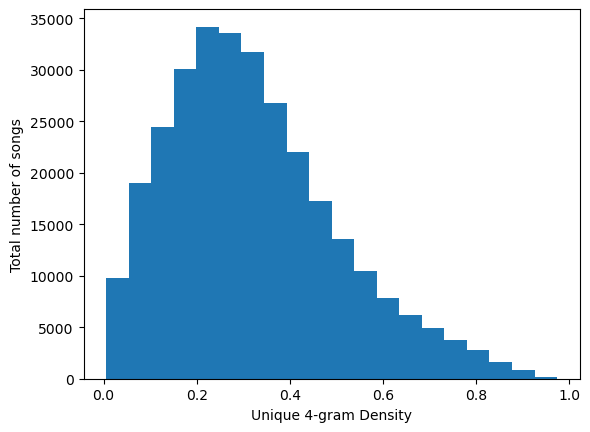

In [34]:
plt.hist(df.unique_4gram_density,bins=20)
print(df.unique_4gram_density.describe())
plt.xlabel('Unique 4-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

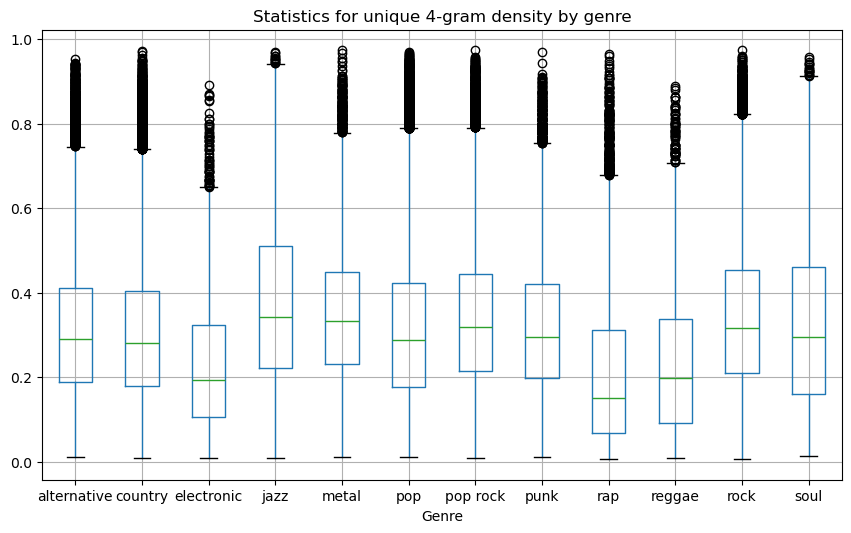

In [35]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_4gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 4-gram density by genre')
plt.show()

In [36]:
#mean unique 4-gram density per genre
df[['unique_4gram_density','main_genre']].groupby('main_genre').mean()

,unique_4gram_density
main_genre,
alternative,0.313449
country,0.308537
electronic,0.236519
jazz,0.378709
metal,0.351790
pop,0.314794
pop rock,0.343112
punk,0.322260
rap,0.213787


Metal starting to rival jazz at the top, with electronic, rap and reggae still the lowest.

<Figure size 640x480 with 0 Axes>

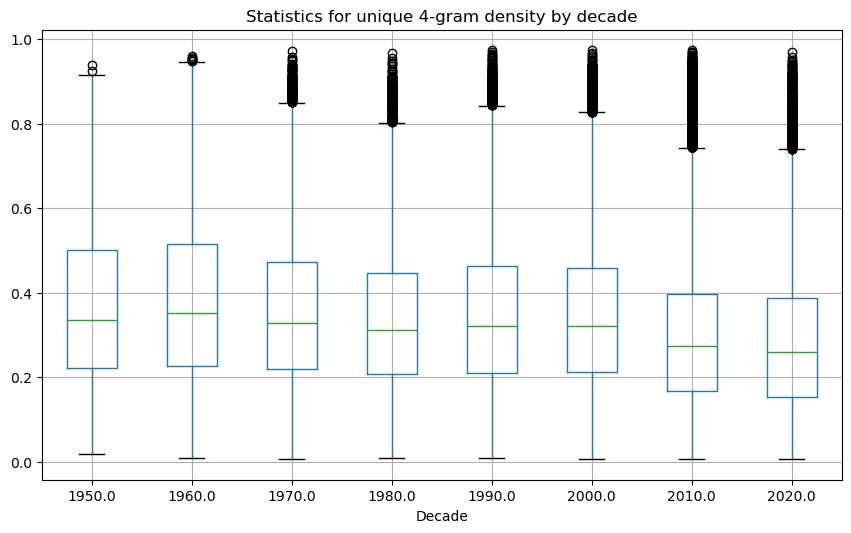

In [37]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_4gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 4-gram density by decade')
plt.show()

In [38]:
#mean unique 4-gram density per decade
df[['unique_4gram_density','decade']].groupby('decade').mean()

,unique_4gram_density
decade,
1950.0,0.376888
1960.0,0.383736
1970.0,0.359803
1980.0,0.341241
1990.0,0.350703
2000.0,0.347938
2010.0,0.297462
2020.0,0.285509


Same general trend.

##### Songs per unique 5-gram density: ####

count    301042.000000
mean          0.365603
std           0.193225
min           0.005435
25%           0.221053
50%           0.346154
75%           0.490196
max           0.975460
Name: unique_5gram_density, dtype: float64


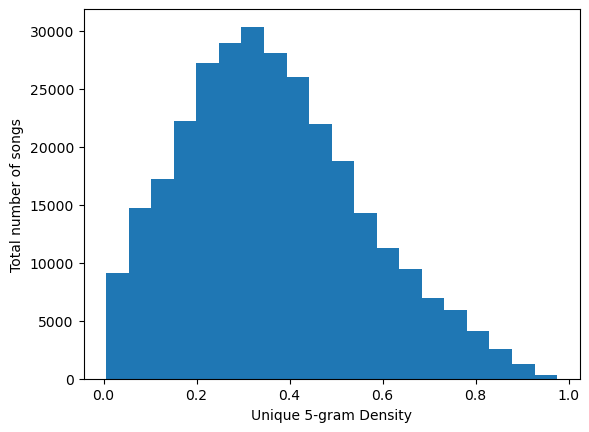

In [39]:
plt.hist(df.unique_5gram_density,bins=20)
print(df.unique_5gram_density.describe())
plt.xlabel('Unique 5-gram Density')
plt.ylabel('Total number of songs')
plt.show()

<Figure size 640x480 with 0 Axes>

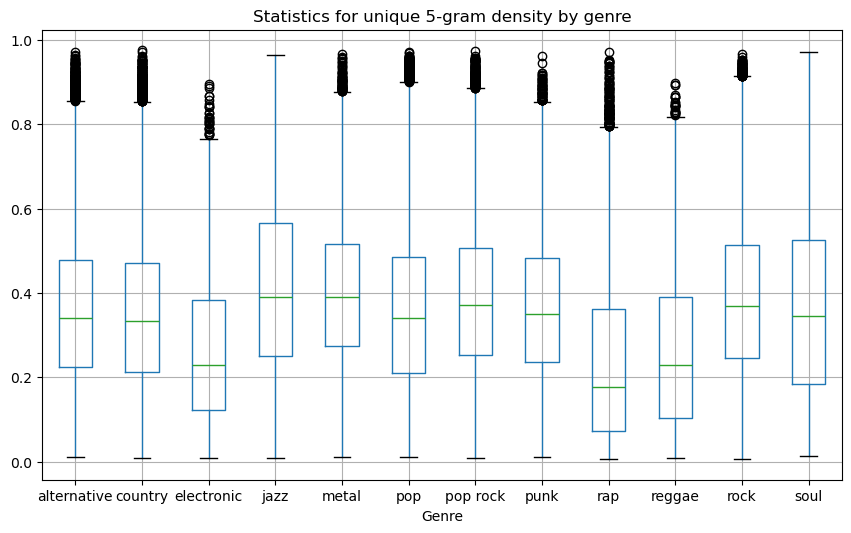

In [40]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_5gram_density',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 5-gram density by genre')
plt.show()

In [41]:
#mean unique 5-gram density per genre
df[['unique_5gram_density','main_genre']].groupby('main_genre').mean()

,unique_5gram_density
main_genre,
alternative,0.359811
country,0.353936
electronic,0.270556
jazz,0.418757
metal,0.402641
pop,0.358938
pop rock,0.388964
punk,0.367711
rap,0.241152


Rap, reggae and electronic still clearly the lowest.

<Figure size 640x480 with 0 Axes>

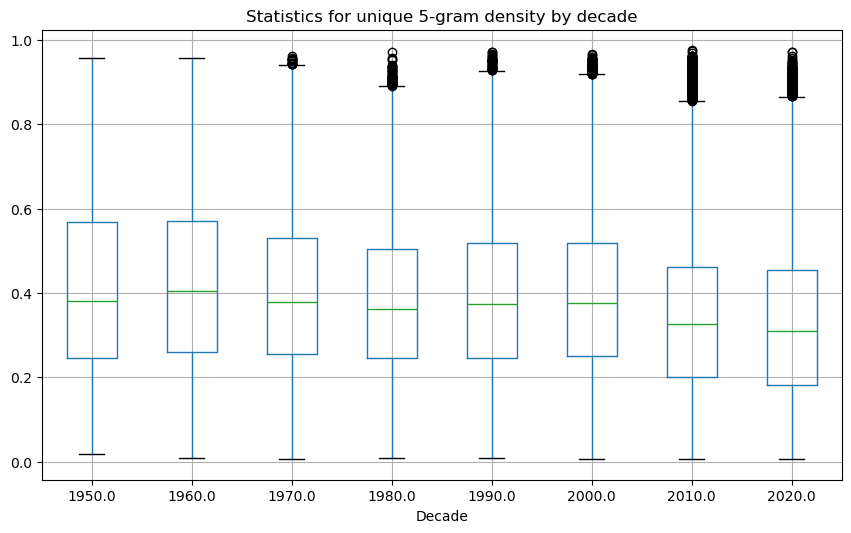

In [42]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_5gram_density',by='decade',figsize=(10,6))
plt.xlabel('Decade')
plt.suptitle('')
plt.title('Statistics for unique 5-gram density by decade')
plt.show()

In [43]:
#mean unique 5-gram density per decade
df[['unique_5gram_density','decade']].groupby('decade').mean()

,unique_5gram_density
decade,
1950.0,0.415971
1960.0,0.424070
1970.0,0.402139
1980.0,0.384990
1990.0,0.393016
2000.0,0.392173
2010.0,0.342666
2020.0,0.329699


Same tend.

#### Songs by unique 2-gram difference ####

count    301042.000000
mean          0.088262
std           0.066859
min          -0.200000
25%           0.041322
50%           0.075000
75%           0.120000
max           0.600000
Name: unique_2gram_difference, dtype: float64


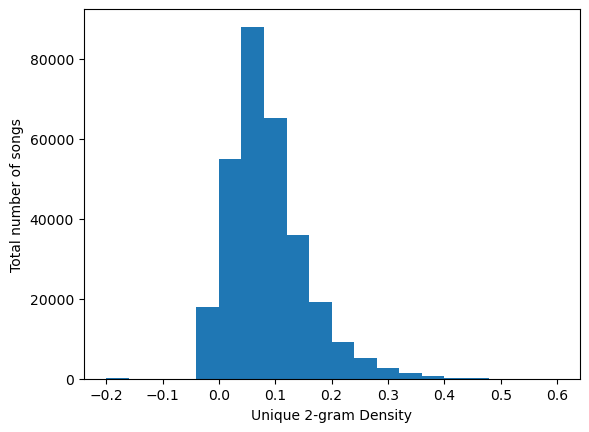

In [44]:
plt.hist(df.unique_2gram_difference,bins=20)
print(df.unique_2gram_difference.describe())
plt.xlabel('Unique 2-gram Density')
plt.ylabel('Total number of songs')
plt.show()

Songs with density -.2 represent those exactly 5 chords long; might remove these from data later.

<Figure size 640x480 with 0 Axes>

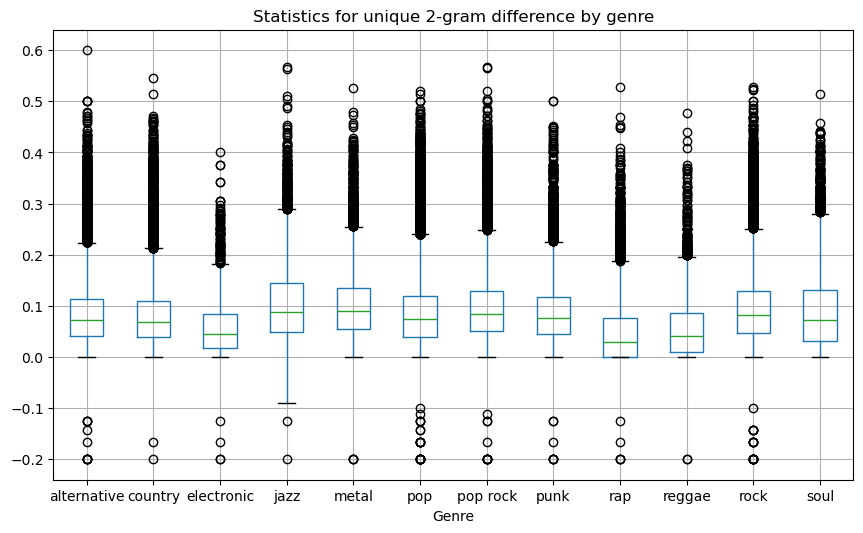

In [45]:
#box and whisker grouped by genre
plt.figure()
df.boxplot(column='unique_2gram_difference',by='main_genre',figsize=(10,6))
plt.xlabel('Genre')
plt.suptitle('')
plt.title('Statistics for unique 2-gram difference by genre')
plt.show()

In [46]:
#mean unique 2-gram  difference density per genre
df[['unique_2gram_difference','main_genre']].groupby('main_genre').mean()

,unique_2gram_difference
main_genre,
alternative,0.084649
country,0.082012
electronic,0.058617
jazz,0.106117
metal,0.102237
pop,0.087225
pop rock,0.097003
punk,0.088576
rap,0.050759


Rap, reggae and electronic clearly the lowest statistics.

<Figure size 640x480 with 0 Axes>

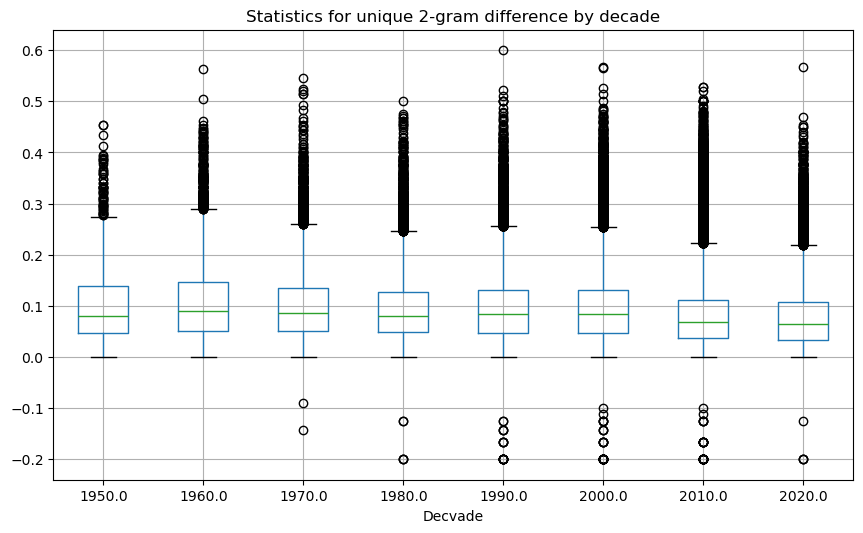

In [47]:
#box and whisker grouped by decade
plt.figure()
df.boxplot(column='unique_2gram_difference',by='decade',figsize=(10,6))
plt.xlabel('Decvade')
plt.suptitle('')
plt.title('Statistics for unique 2-gram difference by decade')
plt.show()

In [48]:
#mean unique 2-gram  difference density per decade
df[['unique_2gram_difference','decade']].groupby('decade').mean()

,unique_2gram_difference
decade,
1950.0,0.102804
1960.0,0.107495
1970.0,0.100760
1980.0,0.095196
1990.0,0.097258
2000.0,0.096645
2010.0,0.080713
2020.0,0.076849


Again, a seemingly downward trend over time.